# Setup

**This notebook demonstrates a way to generate representative EMS event points that allow us to apply clustering algorithms to the problem of optimally placing EMS units.**

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import itertools
import geopandas
from sklearn.cluster import KMeans
from IPython.display import display # display(df) shows dataframe in html formatting

print(sys.version)
print(np.__version__)
print(pd.__version__)

3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
1.11.1
0.18.1


** The example below walks through the steps of this function.**

In [2]:
def get_region_points(region_shape, region_prediction, density_factor=100):
    '''
    Calculates set of points per region based on given density factor.
    
    Input: geopandas polygon shape; prediction value for that shape; and the density factor,
    which is defined as the number of points in a region with area 0.0001 units squared.
    
    Output: Geopandas series of uniformly distribued points within the shape at approximately
    the given density.
    '''
    
    base_density = density_factor / 0.0001
    density = base_density * region_prediction
    points_per_unit = math.sqrt(density) # points per unit of length on a bounding box with given density
    step_size = 1/points_per_unit # length of side per point on a bounding box with given density
    
    # separating bounding box points in to x and y coordinates for easier manipulation
    x1, y1, x2, y2 = region_shape.bounds
    
    # creating a range of values along each axis (lon and lat) according to step_size
    # note that we add the step size to the end point to ensure that it is included in the set of points
    x = np.arange(x1,x2+step_size,step=step_size)
    y = np.arange(y1,y2+step_size,step=step_size)

    # combining axes to create list of all grid points for the grid defined by the axis values
    box_points = geopandas.geoseries.GeoSeries([geopandas.geoseries.Point(point) for point in itertools.product(x,y)])
    
    # extracting the bouding box points that are within the polygon
    poly_points = box_points[box_points.within(region_shape)]
    
    return poly_points

**Importing shape data**

In [3]:
gdf = geopandas.read_file('./zctas/sf_zcta.shp') # importing SF ZCTA shape file

In [4]:
# Adding shape properties for later use
gdf['area'] = gdf.geometry.area
gdf['centroid'] = gdf.geometry.centroid

In [5]:
gdf

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,area,centroid
0,94102,8600000US94102,94102,1732307,0,"POLYGON ((-122.429929 37.777909, -122.426829 3...",0.000180,POINT (-122.4192877923651 37.7796913704253)
1,94116,8600000US94116,94116,6699045,97204,"POLYGON ((-122.510297 37.764073, -122.509833 3...",0.000697,POINT (-122.4861669394649 37.7446069917895)
2,94158,8600000US94158,94158,1703879,1342698,"POLYGON ((-122.397866 37.772323, -122.396381 3...",0.000271,POINT (-122.3875509671313 37.76967230769329)
3,94117,8600000US94117,94117,4373059,1625,"POLYGON ((-122.477297 37.766069, -122.473124 3...",0.000450,POINT (-122.4482273467271 37.769749367556)
4,94104,8600000US94104,94104,200857,0,"POLYGON ((-122.404613 37.793565, -122.401315 3...",0.000021,POINT (-122.4020734762314 37.79145790249981)
5,94129,8600000US94129,94129,5963991,14697,"POLYGON ((-122.485783 37.790629, -122.480296 3...",0.000622,POINT (-122.4668400512062 37.79751989324696)
6,94110,8600000US94110,94110,6019920,12207,"POLYGON ((-122.426722 37.736372, -122.425082 3...",0.000619,POINT (-122.4153763268 37.74995708242039)
7,94132,8600000US94132,94132,8054465,1299131,"POLYGON ((-122.508087717965 37.735197790538, -...",0.000962,POINT (-122.484891415384 37.72215076805941)
8,94108,8600000US94108,94108,698155,0,"POLYGON ((-122.414826 37.794988, -122.404412 3...",0.000071,POINT (-122.4086384226458 37.79203093691396)
9,94111,8600000US94111,94111,891133,494314,"POLYGON ((-122.405922 37.806462, -122.403494 3...",0.000126,POINT (-122.3983586870879 37.79893302468089)


## A Plan

We only have 27 ZCTAs, which is a small set to cluster on. K-means won't work when we have more ambulances than points (and probably won't work that well even if we have fewer ambulances), and is difficult to weight. This approach fills each ZCTA with dummy points in order to give us more points to cluster from. The density of points within a ZCTA is proportional to the number of EMS events that are predicted for that ZCTA, effectively weighting each region by its prediction. **Note that this method will apply to any kind of region for which we have shape files. I refer to ZCTAs as regions because it is more general.**

***Method***
1. For each region:

  a. Calculate the desired density of points using a base density that is then weighted by the number of predicted events.
  
  b. Fill the region's bounding box with a grid of points with the desired density.
  
  c. Check the bounding box points against the region's shape, and keep all that fall within.
  
2. Join the list of contained points from each region to form the training set for clustering.
  
This assumes that a region's predicted dispatches have a uniform probability of falling anywhere in the region.

### Creating points

Region areas are very small, on the order of $10^{-4}$. To begin, let's scale everything so that an area of 0.0001 with 1 predicted event will contain 100 points. I couldn't figure out what the units are, so I'm assuming they are degrees of lat/lon and going with 100 makes the math easy. This will create 100 points per .0001 units squared, which is equivalent to 1,000,000 points per one unit of area. This is the base density, which can be multiplied by the actual number of predicted events to scale a regions density proportionally. From here, we can fill a region's bounding box with points of the correct density and then determine which points belong in the region. The region will then have points in the appropriate density.

Let base density be $D_b$, predicted number of events be $P$, and density $D=PD_b$

From here, we need to know how many points should fall along the side of the bounding box in order to create a grid with density $D$. First, imagine a square containing 1 unit of area. Then the number of points along a side is squared to get $D$. So the number of points on a side is $\sqrt{D}$. The distance between each point on a side is then

$\text{step_size}=\frac{1}{D}$

Using this step size will ensure that any rectangle that has points with this distance along it's edges will have point density $D$. This gives us the basis for forming a grid of points in a bounding box.

##### Calculating density and step size

In [6]:
# Calculating base density
# Note that density_factor is arbitrary
# It is the assumption above that an area of 0.0001 square units and 1 predicted event will have 100 points.
# We may want to treat it like a hyper parameter and tailor it to our needs.

density_factor = 100 # number of points per 0.0001 units squared of area
base_density = density_factor / 0.0001 # scaling number of events
base_density

1000000.0

In [7]:
# scaling by prediction
predicted_event_num = 2 # predicted number of events. THIS IS A DUMMY VALUE FOR DEMONSTRATION
density = base_density * predicted_event_num
points_per_unit = math.sqrt(density) # points per unit of length on a bounding box with given density
step_size = 1/points_per_unit # length of side per point on a bounding box with given density

print(points_per_unit)
print(step_size)

1414.213562373095
0.0007071067811865475


##### Creating grid of points in a region's bounding box

In [8]:
# extracting a single polygon for demonstration
poly = gdf.geometry[0]
print(poly.area)
print(poly.bounds)

0.00017969538050013122
(-122.429929, 37.769441, -122.404743, 37.789226)


In [9]:
# separating bounding box points in to x and y coordinates for easier manipulation
x1, y1, x2, y2 = poly.bounds

In [10]:
# creating a range of values along each axis (lon and lat) according to step_size
# note that we add the step size to the end point to ensure that the end point is included in the set of points
x = np.arange(x1,x2+step_size,step=step_size)
y = np.arange(y1,y2+step_size,step=step_size)

# combining axes to create list of all grid points for the grid defined by the axis values
# converting them to geopandas Point objects in a GeoSeries for easier plotting
box_points = geopandas.geoseries.GeoSeries([geopandas.geoseries.Point(point) for point in itertools.product(x,y)])

In [11]:
print('Number of bounding box grid points:', len(box_points))
box_points

Number of bounding box grid points: 1073


0                      POINT (-122.429929 37.769441)
1              POINT (-122.429929 37.77014810678119)
2              POINT (-122.429929 37.77085521356237)
3              POINT (-122.429929 37.77156232034356)
4              POINT (-122.429929 37.77226942712474)
5              POINT (-122.429929 37.77297653390593)
6              POINT (-122.429929 37.77368364068711)
7               POINT (-122.429929 37.7743907474683)
8              POINT (-122.429929 37.77509785424948)
9              POINT (-122.429929 37.77580496103067)
10             POINT (-122.429929 37.77651206781185)
11             POINT (-122.429929 37.77721917459304)
12             POINT (-122.429929 37.77792628137422)
13             POINT (-122.429929 37.77863338815541)
14             POINT (-122.429929 37.77934049493659)
15             POINT (-122.429929 37.78004760171778)
16             POINT (-122.429929 37.78075470849896)
17             POINT (-122.429929 37.78146181528015)
18             POINT (-122.429929 37.782168922

In [12]:
# Filtering box_points for just the points that are within the polygon
poly_points = box_points[box_points.within(poly)]
print('Number of points within the shape:', len(poly_points))
poly_points

Number of points within the shape: 355


37      POINT (-122.4292218932188 37.77509785424948)
38      POINT (-122.4292218932188 37.77580496103067)
39      POINT (-122.4292218932188 37.77651206781185)
40      POINT (-122.4292218932188 37.77721917459304)
41      POINT (-122.4292218932188 37.77792628137422)
61      POINT (-122.4285147864376 37.77156232034356)
62      POINT (-122.4285147864376 37.77226942712474)
63      POINT (-122.4285147864376 37.77297653390593)
64      POINT (-122.4285147864376 37.77368364068711)
65       POINT (-122.4285147864376 37.7743907474683)
66      POINT (-122.4285147864376 37.77509785424948)
67      POINT (-122.4285147864376 37.77580496103067)
68      POINT (-122.4285147864376 37.77651206781185)
69      POINT (-122.4285147864376 37.77721917459304)
70      POINT (-122.4285147864376 37.77792628137422)
88      POINT (-122.4278076796564 37.77014810678119)
89      POINT (-122.4278076796564 37.77085521356237)
90      POINT (-122.4278076796564 37.77156232034356)
91      POINT (-122.4278076796564 37.772269427

### Testing

##### Checking results against expected number of points in the region and visually comparing the plot of the points against the region

In [13]:
# Checking against expected number of points based on density and area
expected_point_num = poly.area * density
actual_point_num = len(poly_points)
perc_point_error = 100*(expected_point_num - actual_point_num) / expected_point_num
print('Expected number of points:', expected_point_num)
print('Acutal number of points:', actual_point_num)
print('Error:', perc_point_error)

actual_density = actual_point_num / poly.area
perc_density_error = 100*(density - actual_density) / density
print('\nExpected density:', density)
print('Actual density:', actual_density)
print('Error:', perc_density_error)

Expected number of points: 359.39076100026244
Acutal number of points: 355
Error: 1.221723393234151

Expected density: 2000000.0
Actual density: 1975565.532135317
Error: 1.221723393234145


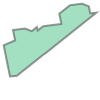

In [14]:
poly

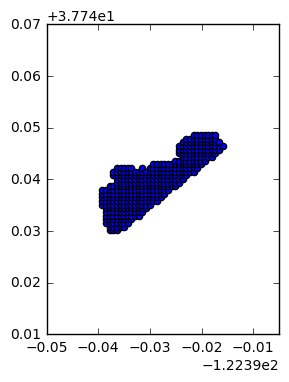

In [15]:
poly_points.plot()

Actual point density using this method is only off by about 1.2%, and visually the plot looks very clean. This seems like a success.

**Checking error and plots for different density factors.**

This shows the grid points for the example polynomial using different values for the density factor, followed by the actual plot of the shape.

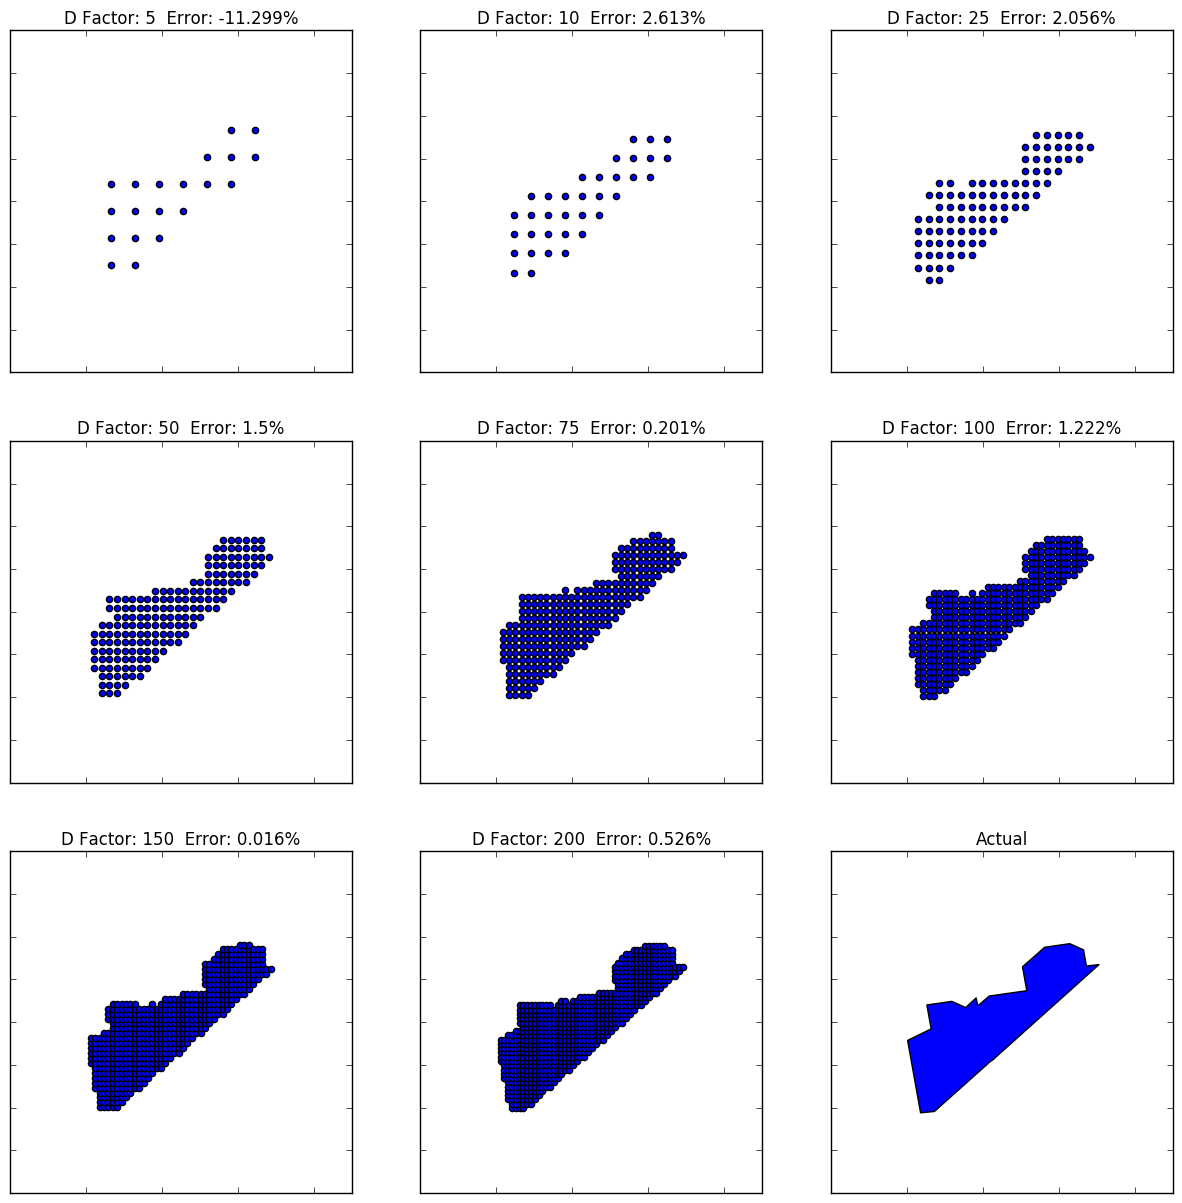

In [16]:
prediction = 2 # a dummy value for the number of predicted events

xlim = None
ylim = None
i = 0
fig = plt.figure(figsize=(15,15))
for d_factor in [5, 10, 25, 50, 75, 100, 150, 200]:
    i += 1
    # Using function from the top, which does everything from the example above
    poly_points = get_region_points(poly, prediction, density_factor=d_factor)
    
    # Calculating Error
    actual_point_num = len(poly_points)
    density = d_factor * prediction / 0.0001
    actual_density = actual_point_num / poly.area
    perc_density_error = 100*(density - actual_density) / density
    
    # adding a subplot
    ax = fig.add_subplot(3,3, i)
    poly_points.plot(ax=ax)
    
    # getting the xlim and ylim of the first plot to make sure all are the same    
    if not xlim:    
        ylim = ax.axes.get_ylim()
        xlim = ax.axes.get_xlim()
    
    # setting plot properties
    ax.axes.set_ylim(ylim)
    ax.axes.set_xlim(xlim)
    ax.axes.set_title('D Factor: ' + str(d_factor) + '  Error: ' + str(round(perc_density_error,3)) + '%')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

# adding the final suplot, with the actual shape
ax = fig.add_subplot(3,3, i+1)
ax.axes.set_ylim(ylim)
ax.axes.set_xlim(xlim)
ax.axes.set_title('Actual')
ax.set_xticklabels([])
ax.set_yticklabels([])
geopandas.geoseries.GeoSeries(poly).plot(ax=ax)

plt.show()

This is just one region, so the errors may be dependent on its shape, but it seems like 50 or 75 is a reasonable value. Larger values will create more points, which will slow the clustering, so there is a tradeoff here. But, the clustering doesn't take very long either way, so not a big deal right now.

# Applying to all regions

First, creating some random region predictions from zero to four events per region.

In [17]:
regions = gdf[['ZCTA5CE10', 'geometry']].copy()
regions['prediction'] = np.random.rand(len(regions)) * 4
regions.columns = ['region_id', 'geometry', 'prediction']
regions.set_index('region_id', inplace=True)
regions

,geometry,prediction
region_id,,
94102,"POLYGON ((-122.429929 37.777909, -122.426829 3...",3.506355
94116,"POLYGON ((-122.510297 37.764073, -122.509833 3...",2.703064
94158,"POLYGON ((-122.397866 37.772323, -122.396381 3...",1.613254
94117,"POLYGON ((-122.477297 37.766069, -122.473124 3...",3.452274
94104,"POLYGON ((-122.404613 37.793565, -122.401315 3...",1.498521
94129,"POLYGON ((-122.485783 37.790629, -122.480296 3...",3.474872
94110,"POLYGON ((-122.426722 37.736372, -122.425082 3...",2.591859
94132,"POLYGON ((-122.508087717965 37.735197790538, -...",2.477595
94108,"POLYGON ((-122.414826 37.794988, -122.404412 3...",1.217243


Creating dataframe of points from each region, tagged by their region

In [18]:
points_df = pd.DataFrame(columns=['region_id', 'geometry']) # initializing dataframe
df_list = [] # holds region dataframes for concatenation at the end

# iterating over every region
for region_id in regions.index:
    temp_region = regions.loc[region_id].copy()
    
    # Testing clustering by ramping up events on Treasure Island to see if it will split it
#     if region_id == '94130':
#         temp_region.prediction = 15
    
    # get the set of points for the region, create dataframe for them with the region id added
    temp_points = get_region_points(temp_region.geometry, temp_region.prediction, density_factor=50)
    temp_df = pd.DataFrame(temp_points, columns=['geometry'])
    temp_df['region_id'] = temp_region.name
    df_list.append(temp_df)

# concatenating to form final combined dataframe
points_df = geopandas.geodataframe.GeoDataFrame(pd.concat(df_list))
points_df.reset_index(drop=True, inplace=True)

# transforming point objects to a tuple of (lon, lat) for use in clustering
points_df['lon_lat'] = points_df.geometry.apply(lambda p: (p.x, p.y))

In [19]:
points_df

,geometry,region_id,lon_lat
0,POINT (-122.4291737564401 37.77472770491921),94102,"(-122.42917375644012, 37.77472770491921)"
1,POINT (-122.4291737564401 37.77548294847909),94102,"(-122.42917375644012, 37.775482948479095)"
2,POINT (-122.4291737564401 37.77623819203898),94102,"(-122.42917375644012, 37.77623819203898)"
3,POINT (-122.4291737564401 37.77699343559887),94102,"(-122.42917375644012, 37.77699343559887)"
4,POINT (-122.4291737564401 37.77774867915875),94102,"(-122.42917375644012, 37.777748679158755)"
5,POINT (-122.4284185128802 37.77095148711977),94102,"(-122.42841851288024, 37.770951487119774)"
6,POINT (-122.4284185128802 37.77170673067966),94102,"(-122.42841851288024, 37.77170673067966)"
7,POINT (-122.4284185128802 37.77246197423955),94102,"(-122.42841851288024, 37.77246197423955)"
8,POINT (-122.4284185128802 37.77321721779943),94102,"(-122.42841851288024, 37.773217217799434)"
9,POINT (-122.4284185128802 37.77397246135932),94102,"(-122.42841851288024, 37.77397246135932)"


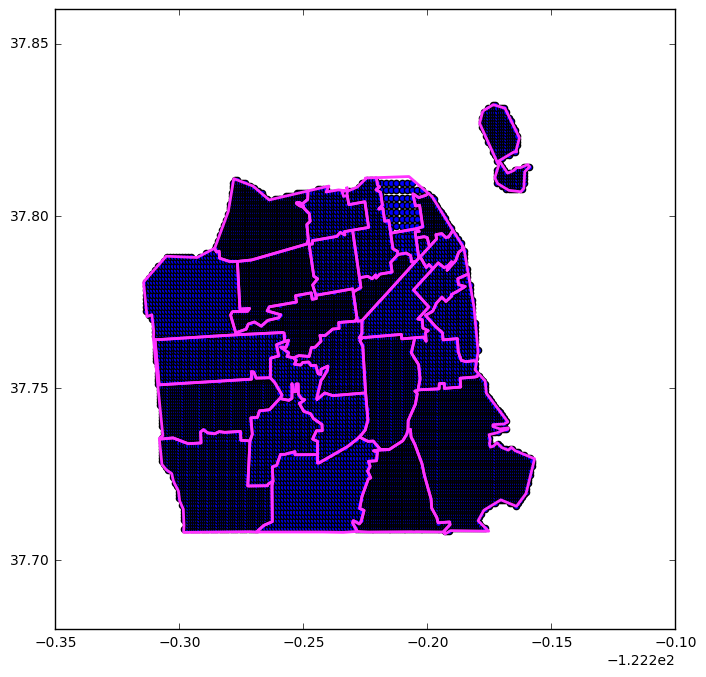

In [20]:
fig, ax = plt.subplots(1, figsize=(8, 8))
points_df.plot(ax=ax)
regions.geometry.boundary.plot(ax=ax, color='#ff33ff', linewidth=2)

# Implementing K-means

In [21]:
k = 30 # The number of ambulances

train_data = np.array(list(points_df.lon_lat)) # reshaping coordinates to work with KMeans
kmeans = KMeans(n_clusters=k).fit(train_data) # fitting clusters
points_df['cluster'] = kmeans.labels_ # adding cluster label to dataframe

**Printing the cluster centroids**

These are the final ambulance locations, i.e. the final output of the method.

In [22]:
kmeans.cluster_centers_

array([[-122.49826297,   37.75273277],
       [-122.39976224,   37.73847378],
       [-122.43340677,   37.77321022],
       [-122.45757835,   37.74194374],
       [-122.45358412,   37.79810828],
       [-122.39916811,   37.79648029],
       [-122.38655037,   37.71901213],
       [-122.44313152,   37.72216165],
       [-122.49822621,   37.73377568],
       [-122.48812875,   37.71750223],
       [-122.36951854,   37.82050974],
       [-122.40408933,   37.71822795],
       [-122.45327584,   37.78190198],
       [-122.47348098,   37.7964467 ],
       [-122.38098192,   37.73975933],
       [-122.42911798,   37.79800308],
       [-122.41561068,   37.78187515],
       [-122.47618826,   37.75562597],
       [-122.43451657,   37.74885663],
       [-122.36870582,   37.72473364],
       [-122.39048247,   37.75592388],
       [-122.41757503,   37.73535701],
       [-122.45195337,   37.7642016 ],
       [-122.39341058,   37.77603796],
       [-122.42127295,   37.71683986],
       [-122.41386885,   

**Plotting for visual inspection.**

[]

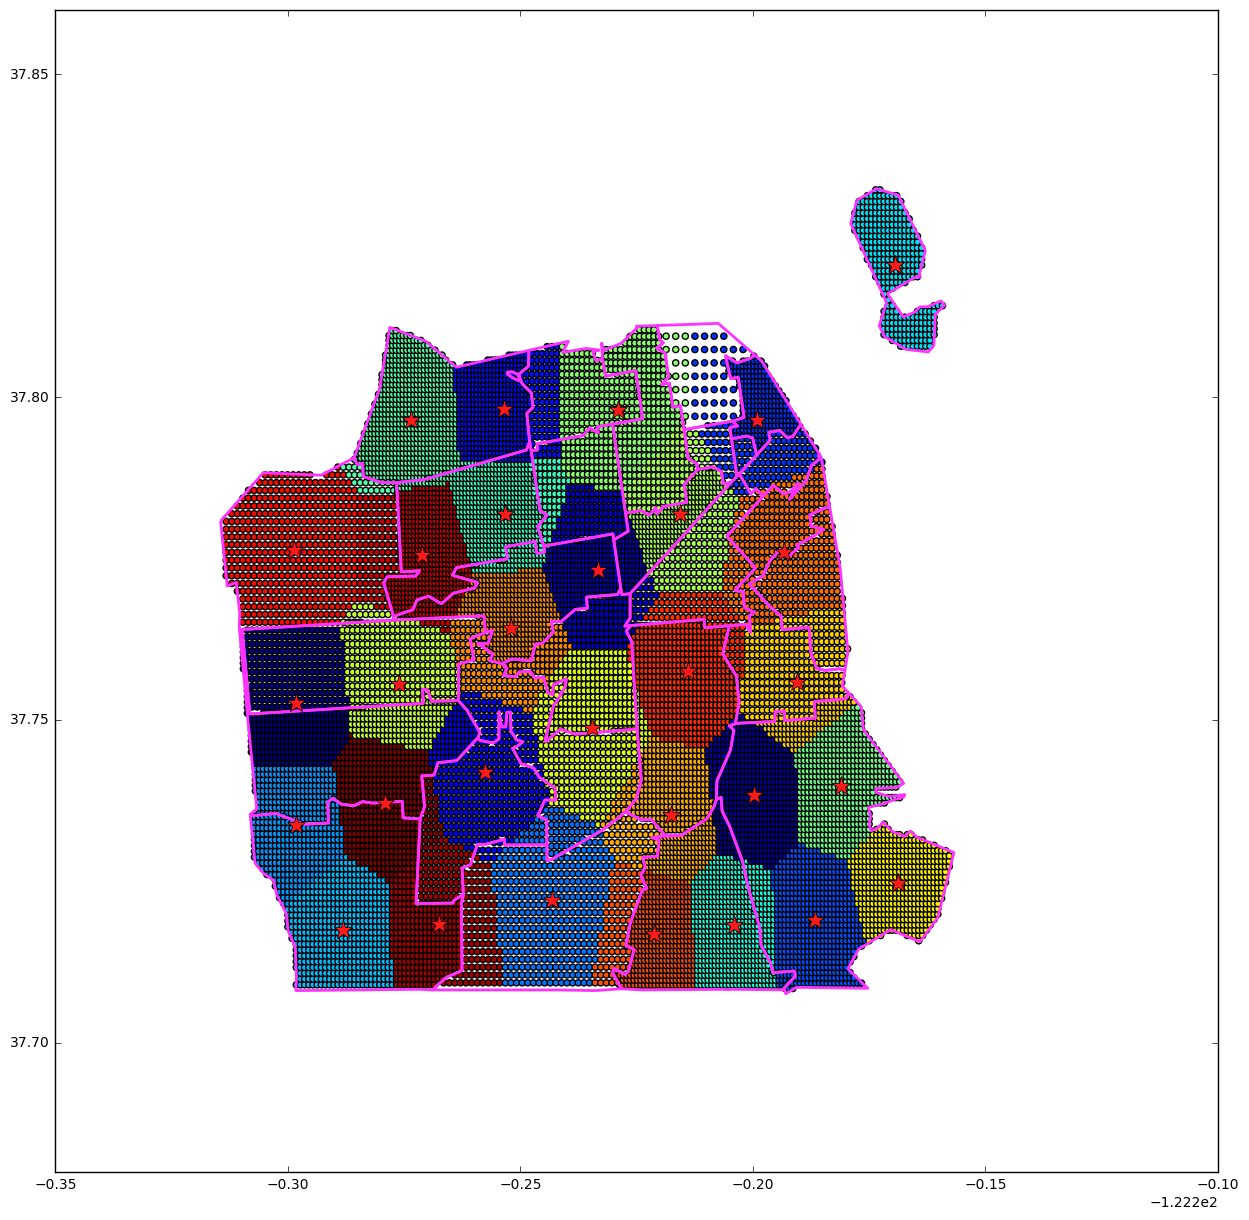

In [23]:
fig, ax = plt.subplots(1, figsize = (15,15))
points_df.plot(ax=ax,column='cluster')
regions.geometry.boundary.plot(ax=ax, color='#ff33ff', linewidth=2)
plt.plot(*zip(*kmeans.cluster_centers_), marker='*', markersize=14, color='#ff1a1a', ls='')
plt.plot()